# 이변량_범주 vs 숫자

## 1.환경준비

* 라이브러리 불러오기

In [4]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.
> 타이타닉 생존자

|	변수	|	설명	|	값 설명	|
|	----	|	----	|	----	|
|	survived	|	생존여부	|	0 - 사망, 1- 생존	|
|	Pclass	|	Ticket class	|	1 = 1st, 2 = 2nd, 3 = 3rd	|
|	Sex	|	성별	|		|
|	Age	|	Age in years	|		|
|	Sibsp	|	# of siblings / spouses aboard the Titanic	|		|
|	Parch	|	# of parents / children aboard the Titanic	|		|
|	Ticket	|	Ticket number	|		|
|	Fare	|	Passenger fare	|		|
|	Cabin	|	Cabin number	|		|
|	Embarked	|	Port of Embarkation	|	C = Cherbourg, Q = Queenstown, S = Southampton	|


In [2]:
# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.0.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


범주별 숫자를 비교할 때 사용되는 방식은 **범주별 평균 비교** 입니다.  


## 2.범주 --> 숫자

titanic data에서 Age를 Y로 두고 비교해 봅시다.

### 1) 시각화 : 평균 비교 barplot, boxplot 

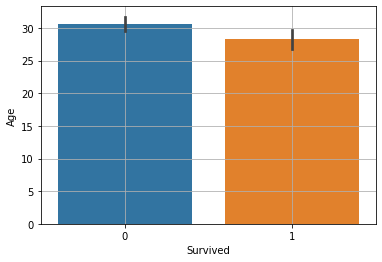

In [42]:
# sns.barplot는 두 범주의 평균 비교 sns.barplot
sns.barplot(x="Survived", y="Age", data=titanic)
plt.grid()
plt.show()

위 두 범주간에 평균에 차이가 있나요?

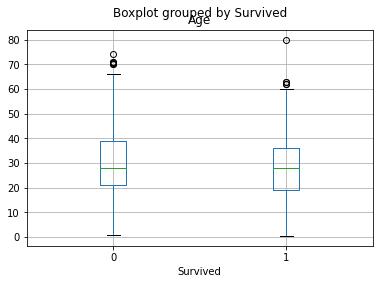

In [5]:
# 박스플롯으로 비교해 봅시다.
titanic.boxplot('Age', 'Survived')
plt.show()

### 2)수치화 : t-test(두 범주), anova(세 범주 이상)

#### ①t-test
두 집단의 평균을 비교합니다.
* 예제는 Two sample T-test와 양측검정만 다룹니다. 
* 우리는 X --> Y의 관계에서 ,두 변수간에 관련이(차이가) 있는지, 없는지를 확인하는 것이 제일 중요하기 때문입니다.

* 주의사항 : 데이터에 NaN이 있으면 계산이 안됩니다. .notnull() 등으로 NaN을 제외한 데이터를 사용해야 합니다.

* t 통계량
    * 두 평균의 차이를 표준오차로 나눈 값.
    * 기본적으로는 두 평균의 차이로 이해해도 좋습니다.
    * 우리의 가설(대립가설)은 차이가 있다는 것이므로, t 값이 크던지 작던지 하기를 바랍니다. 
    * 보통, t 값이 -2보다 작거나, 2보다 크면 차이가 있다고 봅니다. 

In [1]:
import scipy.stats as spst
import numpy as np
import random as rd


In [2]:
# 모집단 만들기
pop1 = [round(rd.normalvariate(160, 10),1) for i in range(100000)]
pop2 = [round(rd.normalvariate(170, 10),1) for i in range(100000)]

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


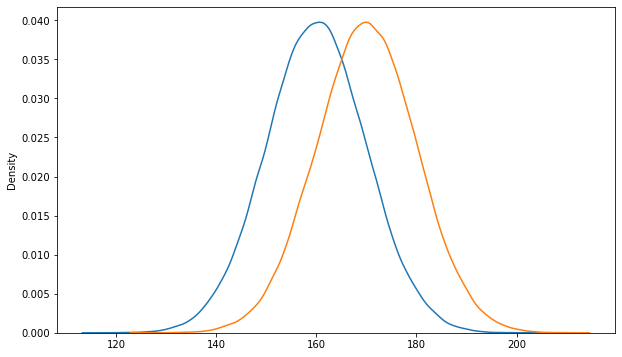

In [5]:
# 우리는 모집단을 알 수 없지만. 그래도 살짝 살펴봅시다.
plt.figure(figsize=(10,6))
sns.distplot(pop1, hist=False, kde=True)
sns.distplot(pop2, hist=False, kde=True)
plt.show()

In [6]:
# 표본을 추출합니다. 먼저 pop1으로 부터 두 샘플을 추출합시다.
s1 = rd.sample(pop1,100)
s2 = rd.sample(pop1,100)


In [7]:
# t-test
spst.ttest_ind(s1, s2)

Ttest_indResult(statistic=0.3422383654059195, pvalue=0.7325345177853559)

p.value의 의미는?

In [10]:
# 이번에는 두 모집단으로 부터 각각 샘플링
s1 = rd.sample(pop1,100)
s2 = rd.sample(pop2,100)

In [11]:
# t-test
spst.ttest_ind(s1, s2)

Ttest_indResult(statistic=-6.778792990916821, pvalue=1.359468044554964e-10)

p.value의 의미는?

* 이번엔 타이타닉 데이터로 시도해 봅시다.
    * 생존여부 --> Age : 생존여부 별로 나이에 차이가 있을것이다.


In [8]:
# 먼저 NaN이 있는지 확인해 봅시다.
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
temp = titanic.loc[titanic['Age'].notnull()] # NaN 는 빼고 나머지 넣어라.
died = temp.loc[temp['Survived']==0, 'Age'] # 그중 죽은사람들 나이
survived = temp.loc[temp['Survived']==1, 'Age'] # 산사람들나이

In [10]:
spst.ttest_ind(died, survived)  # 결과 (T통계량 , p-value)
                                # t통계량이 2이상 or -2이하이면 연관이있다고 본다.
                                # pvalue 가 0.05 보다 작은가.

Ttest_indResult(statistic=2.06668694625381, pvalue=0.03912465401348249)

#### 실습 : t-test

성별에 따라 운임에 차이가 있을 것이다.

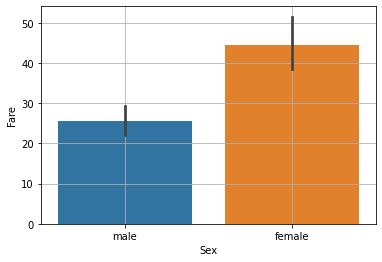

In [13]:
# 시각화
sns.barplot(x= 'Sex', y='Fare', data = titanic)
plt.grid()
plt.show()

In [14]:
# 수치화  t-test
# tmp = titanic.loc[titanic['Sex'].notnull()]
male = tmp.loc[titanic['Sex'] == 'male', 'Fare' ]
female = tmp.loc[titanic['Sex'] == 'female', 'Fare']
spst.ttest_ind(male, female)

Ttest_indResult(statistic=-5.529140269385719, pvalue=4.2308678700429995e-08)

In [15]:
spst.ttest_ind(female, male)

Ttest_indResult(statistic=5.529140269385719, pvalue=4.2308678700429995e-08)

#### ②anova

* 분산 분석 **AN**alysis **O**f **VA**riance
* 여러 집단 간에 차이는 어떻게 비교할 수 있을까요?
* 여기서 기준은 전체 평균 입니다.
* 𝐹 통계량 = 
    * (집단 간 분산)/(집단 내 분산) = (전체 평균 − 각 집단 평균)/(각 집단의 평균 − 개별 값)
    * 값이 대략 2~3 이상이면 차이가 있다고 판단합니다.

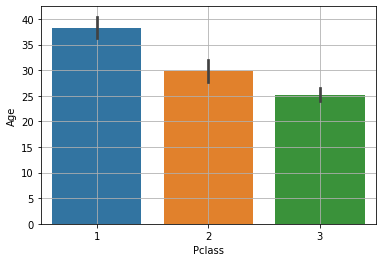

In [16]:
# Pclass(3 범주) --> Age
sns.barplot(x="Pclass", y="Age", data=titanic)
plt.grid()
plt.show()

# 평균들 차이가 많이 나므로 검정해도 뻔할것이다 대부분

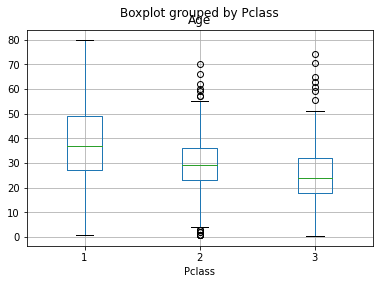

In [17]:
titanic.boxplot('Age', 'Pclass')
plt.show()

In [20]:
tmp = titanic.loc[titanic['Age'].notnull()]

P_1 = tmp.loc[titanic.Pclass == 1, 'Age']
P_2 = tmp.loc[titanic.Pclass == 2, 'Age']
P_3 = tmp.loc[titanic.Pclass == 3, 'Age']

In [21]:
spst.f_oneway(P_1, P_2, P_3) # statistic 분산비 ( 2, 3 보다크다면?)

F_onewayResult(statistic=57.443484340676214, pvalue=7.487984171959904e-24)


#### 실습 ANOVA

승선지역(Embarked)별로 운임에 차이가 있을 것이다.
* 시각화와 수치화로 확인해 봅시다.

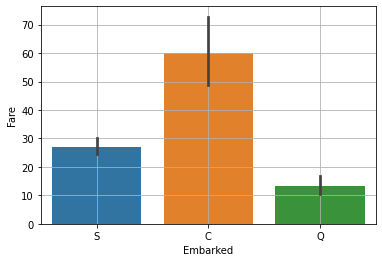

In [22]:
# 시각화
sns.barplot(x="Embarked", y="Fare", data=titanic)
plt.grid()
plt.show()

# p밸류는 작을것이고 F 통계량은 클것이다 예상할수있음


In [24]:
# 수치화
tmp = titanic.loc[titanic['Fare'].notnull()]

S = tmp.loc[titanic['Embarked'] == 'S', 'Fare']
C = tmp.loc[titanic['Embarked'] == 'C', 'Fare']
Q = tmp.loc[titanic['Embarked'] == 'Q', 'Fare']

spst.f_oneway(S, C, Q) # statistic 분산비 ( 2, 3 보다크다면?)

F_onewayResult(statistic=38.14030520011266, pvalue=1.2896450252631794e-16)

## 3.종합실습

### 1) 환경준비

* 라이브러리 불러오기

In [25]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.
> ① 타이타닉 생존자  
② 카시트 매출액


① 타이타닉 생존자

|	변수	|	설명	|	값 설명	|
|	----	|	----	|	----	|
|	survived	|	생존여부	|	0 - 사망, 1- 생존	|
|	Pclass	|	Ticket class	|	1 = 1st, 2 = 2nd, 3 = 3rd	|
|	Sex	|	성별	|		|
|	Age	|	Age in years	|		|
|	Fare	|	Passenger fare	|		|
|	Embarked	|	Port of Embarkation	|	C = Cherbourg, Q = Queenstown, S = Southampton	|


In [26]:
# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.1.csv', 
                      usecols = ['Survived','Pclass','Sex','Age','Fare','Embarked'])
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


② 카시트 매출액

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매액(단위 : 1000달러)	|	Target	|
|	CompPrice 	|	 경쟁사 가격(단위 : 달러)	|	feature	|
|	Income 	|	 지역 평균 소득(단위 : 1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Urban 	|	 도심 지역 여부(0,1)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(0,1)	|	feature	|


In [27]:
# 카시트 매출액
path = 'https://raw.githubusercontent.com/JunhoYu/Data-Analysis/main/Carseats.csv'
carseat = pd.read_csv(path)
carseat.drop('Education', axis = 1, inplace = True)
carseat.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


### 2) 범주 --> 숫자 : 시각화

① titanic 생존여부에 따라 나이에 차이가 있을까요?
* 평균 barplot으로 시각화 해 봅시다.

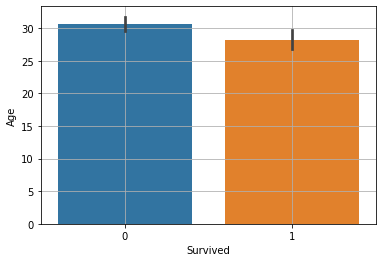

In [28]:
sns.barplot(x = 'Survived', y = 'Age' , data = titanic)
plt.grid()
plt.show()

* 박스플롯으로 시각화 해 봅시다.

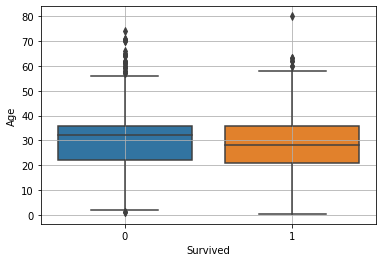

In [29]:
sns.boxplot(x = 'Survived', y = 'Age' , data = titanic)
plt.grid()
plt.show()

* 위 두 범주간에 평균에 차이가 있나요?

- ANS) 31, 26거의비슷한거같다

② titanic 성별에 따라 운임에 차이가 있을까요?
* 평균 barplot으로 시각화 해 봅시다.

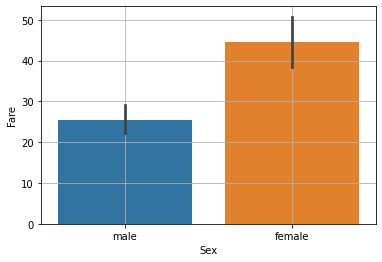

In [30]:
sns.barplot(x= 'Sex',y = 'Fare', data = titanic)
plt.grid()
plt.show()

* 박스플롯으로 시각화 해 봅시다.

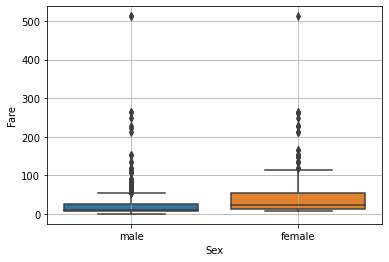

In [31]:
sns.boxplot(x= 'Sex',y = 'Fare', data = titanic)
plt.grid()
plt.show()

* 위 범주간 평균에 차이가 있나요?

- ANS) 25 , 45 로 차이가 꽤 크다

③ titanic 승선지역(Embarked)에 따라 나이에 차이가 있을까요?
* 평균 barplot으로 시각화 해 봅시다.

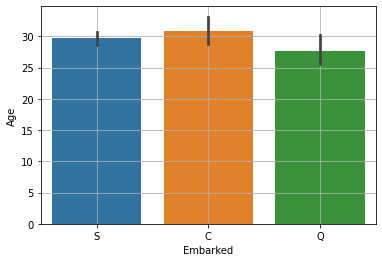

In [32]:
sns.barplot(x= 'Embarked',y = 'Age', data = titanic)
plt.grid()
plt.show()

* 박스플롯으로 시각화 해 봅시다.

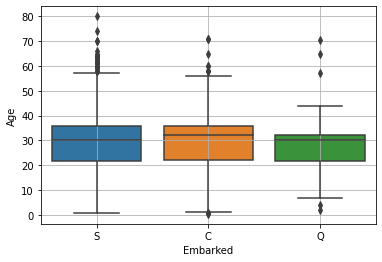

In [34]:
sns.boxplot(x= 'Embarked',y = 'Age', data = titanic)
plt.grid()
plt.show()

* 위 범주간 평균에 차이가 있나요?

- ANS) 28~31 로 거의비슷

④ carseat의 국내외여부(US)에 따라 매출액(Sales)에 차이가 있을까요?
* 평균 barplot으로 시각화 해 봅시다.

* 박스플롯으로 시각화 해 봅시다.

⑤ carseat의 진열상태(ShelveLoc)에 따라 매출액(Sales)에 차이가 있을까요?
* 평균 barplot으로 시각화 해 봅시다.

* 박스플롯으로 시각화 해 봅시다.

* 위 범주간 평균에 차이가 있나요?

### 3)수치화 : t-test(두 범주), anova(세 범주 이상)

① titanic 생존여부에 따라 나이에 차이가 있을까요?

* t-test를 수행해 봅시다.

In [36]:
# 먼저 범주별로 데이터를 나누자

# tmp = titanic.loc[titanic['Age'].notnull()]

Sur = tmp.loc[titanic['Survived'] == 1, 'Age']
Die = tmp.loc[titanic['Survived'] == 0, 'Age']

spst.ttest_ind(Sur, Die)
# spst.f_oneway(Sur, Die) # statistic 분산비 ( 2, 3 보다크다면?)


Ttest_indResult(statistic=-2.6686741711011606, pvalue=0.007753857024893963)

* t-test 결과를 해석해 봅시다.

- ANS) t검정을 통해 -2.6이라는값은 2~3 결과치에 부합하므로 우리가 세운 대립가설과 연관이있다고 본다.  또한 pvalue 값이 0.007%로 0.05보다 작은값이므로 우리가 세운가설이 맞을 것이라고 판다.

② titanic 성별에 따라 운임에 차이가 있을까요?

* t-test를 수행해 봅시다.

In [37]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 41.9+ KB


In [39]:
tmp = titanic.loc[titanic['Fare'].notnull()]

male = tmp.loc[titanic['Sex'] == 'male', 'Fare']
female = tmp.loc[titanic['Sex'] == 'female', 'Fare']

spst.ttest_ind(male, female)

Ttest_indResult(statistic=-5.529140269385719, pvalue=4.2308678700429995e-08)

* t-test 결과를 해석해 봅시다.

③ titanic 승선지역(Embarked)에 따라 나이에 차이가 있을까요?

* 분산분석(anova)을 수행해 봅시다.

In [40]:
# tmp = titanic.loc[titanic['Fare'].notnull()]

S = tmp.loc[titanic['Embarked'] == 'S', 'Age']
Q = tmp.loc[titanic['Embarked'] == 'C', 'Age']
C = tmp.loc[titanic['Embarked'] == 'Q', 'Age']

spst.f_oneway(S,Q,C)

F_onewayResult(statistic=1.5519517205674485, pvalue=0.2124081352616724)

* anova 결과를 해석해 봅시다.

- ANS) p밸류가 너무크므로 대립가설로 쓸수없다.